### Student Information
Name: 林威盛

Student ID: 111062201

GitHub ID: jason34105533

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

In [15]:
# Starts the work
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import math
import helpers.data_mining_helpers as dmh

[nltk_data] Downloading package punkt to /home/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
FILE = "./newdataset/Reddit-stock-sentiment.csv"

# Read the dataset
df = pd.read_csv(FILE)
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [17]:
df.shape

(847, 16)

In [18]:
df['text'][0]

'Calls on retards'

### Simplified DataSet

In [19]:
# Get simplfied dataframe
X = df[['text', 'subreddit', 'sentiment', 'title']]
X.head(10)

,text,subreddit,sentiment,title
0,Calls on retards,wallstreetbets,-1.0,Retardation is on the menu boys! WSB is so back
1,Stunt as in like why did they even make a big ...,wallstreetbets,1.0,Retail giant TARGET has now declined for 10 co...
2,Seeing lots of red in the ticker.,StockMarket,0.0,How do you feel about a sitting president maki...
3,Vision Marine Technologies Inc. is rewriting t...,stockstobuytoday,1.0,Who knows more? $VMAR
4,He didn’t say thank you.,StockMarket,0.0,The Trump administration is begging Xi Jinping...
5,"Hoping to ejaculate in wet warm puss tonight, ...",wallstreetbets,1.0,Weekend Discussion Thread for the Weekend of A...
6,Trump will respond to china increasing their t...,stocks,-1.0,Is the market in complete denial right now?
7,Confirmed not a trap. Its been like this for p...,wallstreetbets,1.0,Retardation is on the menu boys! WSB is so back
8,Am I the only one seeing the cup & handle brea...,stocks,1.0,"It's fucking awful seeing the ""Silver"" misinfo..."
9,HLGN is $10. Hurry and catch it now before it ...,stockstobuytoday,0.0,Any cheap stocks under $10?


### Sentiment Distribution by Subreddit

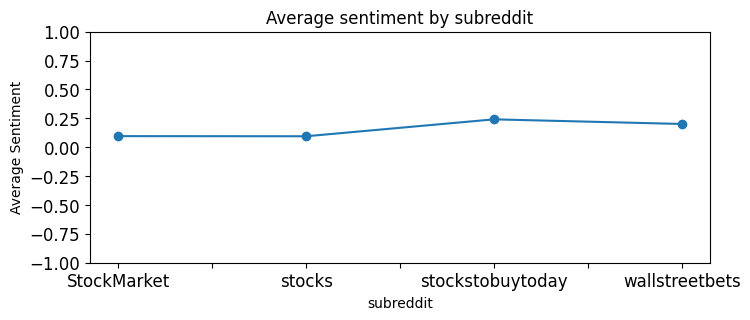

In [20]:
# Plot the Average 'sentiment' distribution over the different 'subreddit's
import matplotlib.pyplot as plt

# Plot the Average 'sentiment' distribution over the different 'subreddit's
X.groupby('subreddit')['sentiment'].mean().plot(kind='line',
                                               title='Average sentiment by subreddit',
                                               ylim=[-1, 1], 
                                               marker='o', fontsize=12, figsize=(8,3))
plt.ylabel('Average Sentiment')
plt.show()

In [21]:
# A Sentiment Distribution Heatmap
import plotly.express as px
fig = px.density_heatmap(X, x='subreddit', y='sentiment', nbinsx=20, nbinsy=20, 
                         title='Sentiment Distribution Heatmap by Subreddit', 
                         labels={'subreddit':'Subreddit', 'sentiment':'Sentiment'})
fig.update_layout(yaxis=dict(tickmode='array', tickvals=[-1, -0.5, 0, 0.5, 1], ticktext=['-1', '-0.5', '0', '0.5', '1']))
fig.show()  

### Overall Sentiment Distribution with Radar Chart

In [22]:
# Create a radar chart for sentiment distribution
import plotly.graph_objects as go

# Count sentiment values
sentiment_counts = X['sentiment'].value_counts().sort_index()

# Create radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=sentiment_counts.values,
    theta=['Negative (-1)', 'Neutral (0)', 'Positive (1)'],
    fill='toself',
    name='Sentiment Distribution'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, sentiment_counts.max()]
        )),
    showlegend=True,
    title="Sentiment Distribution Radar Chart"
)

fig.show()

# print out a table of the sentiment distribution
sentiment_distribution = X['sentiment'].value_counts().sort_index()
sentiment_distribution_df = pd.DataFrame(sentiment_distribution).reset_index()
sentiment_distribution_df.columns = ['Sentiment', 'Count']
sentiment_distribution_df 

,Sentiment,Count
0,-1.0,197
1,0.0,331
2,1.0,319


### Frequency Words in Text

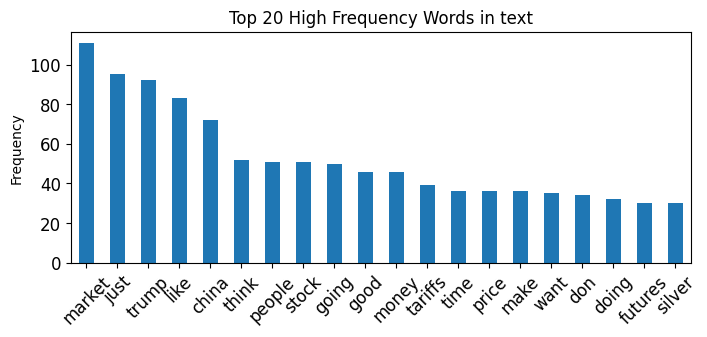

In [23]:
# Frequency word bar chart

# Get the top 20 high frequency words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X_vectorized = vectorizer.fit_transform(X['text'])
X_vectorized_df = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())
X_vectorized_df.head()
X_vectorized_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(8,3), 
                                                       title="Top 20 High Frequency Words in text", rot=45, fontsize=12)
plt.ylabel('Frequency')
plt.show()

#### Hot Titles

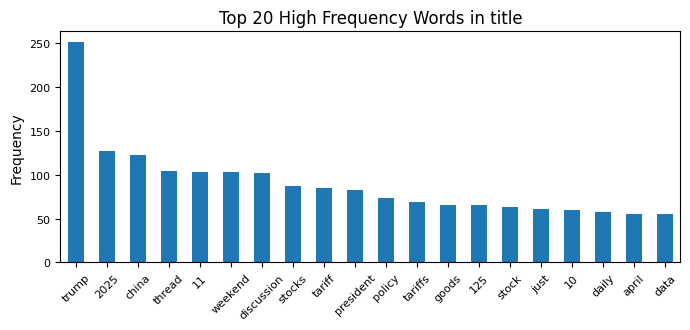

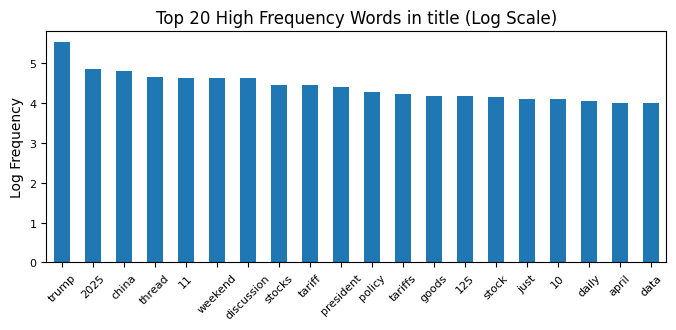

In [24]:
# Top 10 high frequency words for a title

vectorizer_title = CountVectorizer(stop_words='english', max_features=20)
X_vectorized_title = vectorizer_title.fit_transform(X['title'])
X_vectorized_title_df = pd.DataFrame(X_vectorized_title.toarray(), columns=vectorizer_title.get_feature_names_out())
X_vectorized_title_df.head()
X_vectorized_title_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(8,3), 
                                                           title="Top 20 High Frequency Words in title", rot=45, fontsize=8)
plt.ylabel('Frequency')
plt.show()


# Frequency in log scale
X_vectorized_title_df.sum().sort_values(ascending=False).apply(lambda x: math.log(x)).plot(kind='bar', figsize=(8,3), 
                                                       title="Top 20 High Frequency Words in title (Log Scale)", rot=45, fontsize=8)
plt.ylabel('Log Frequency')
plt.show()

### Heatmap of Word Frequency in Text

In [25]:
# Heat map of random 30 articles and their top 20 high frequency words
import plotly.express as px
import random
random_indices = random.sample(range(X_vectorized_df.shape[0]), 30)
fig = px.imshow(X_vectorized_df.iloc[random_indices].T, 
                labels=dict(x="Article Index", y="Word", color="Frequency"),
                x=[f"Article {idx}" for idx in random_indices],
                y=X_vectorized_df.columns,
                title="Heatmap of Top 20 High Frequency Words in Random 30 Articles")
fig.update_xaxes(side="top")
fig.show()

### WordCloud Visualization

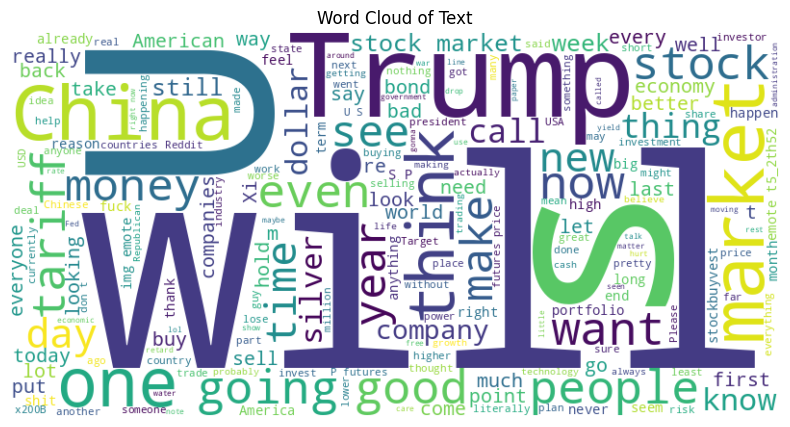

In [28]:
# Umm I couldn't draw Word Cloud by helpers function from TAs, since it returns 'no module named plotly.plotly'.

import matplotlib.pyplot as plt
from wordcloud import WordCloud


Whole_Content = ' '.join(X['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Whole_Content)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text')
plt.show()


### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [29]:
### Begin Assignment Here

# Phase 2

In [30]:
### Begin Assignment Here